In [1]:
import ssl
import urllib
context = ssl._create_unverified_context()
from urllib.request import Request, urlopen
import json
from io import StringIO
import pandas as pd
import ast

In [2]:
from itertools import cycle
import plotly.graph_objs as go
from plotly.subplots import make_subplots
# for legend
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import ast

In [4]:
import datetime

In [5]:
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolsClient
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import DMToolTestData
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import PlotlyTrace
from brown_edu_dmtools.dmtools_client_package.dmtools_client_module import MplTrace

In [6]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
#load_dotenv(path.join(BASE_DIR, ".env"))
load_dotenv(path.join(BASE_DIR, ".env"), override=True)
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)
#Client.request_header

In [7]:
plot_id = 306

<module 'matplotlib.pyplot' from '/home/home_user/Code/dmtools_notebooks/env/lib64/python3.12/site-packages/matplotlib/pyplot.py'>

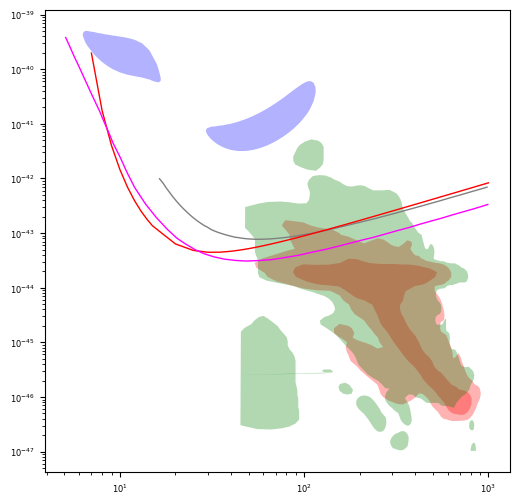

In [8]:
width_in = 400
height_in = 400
# Set the desired height of the font in inches
#px = 1/plt.rcParams['figure.dpi']  # pixel in inches
#px = 1/300
Client.get_mpl_plot(plot_id)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

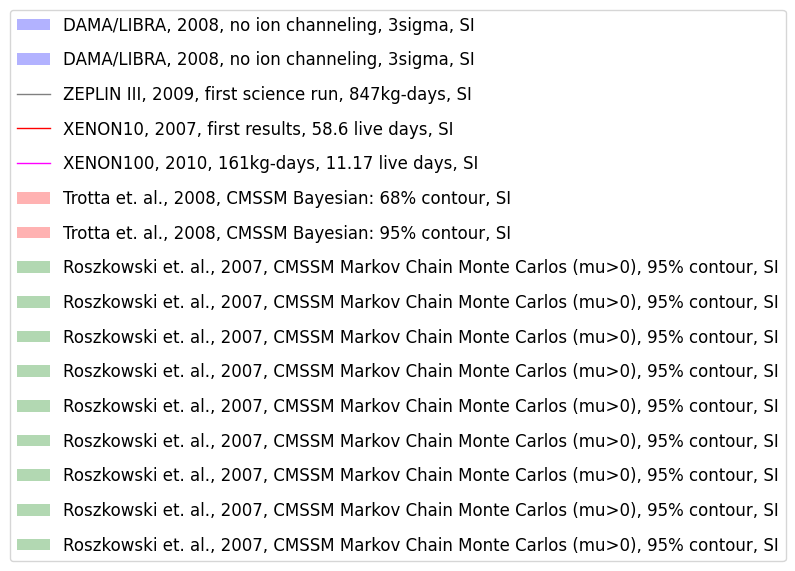

In [9]:
datasets = Client.read_by_plot_id(subject='data_display',id=plot_id)

small_trigger = 200
width_in = 600
height_in = 300

handles = []

for d in datasets:
    data_id = d['data_id']
    trace_data = Client.read(id=data_id)
    trace_name = trace_data[0]['data_label']
    string_data = trace_data[0]['data']
    style = d['style']
    color = d['color']
    pt = MplTrace()
    pt.set_values(color, style)
    list_data = ast.literal_eval(string_data)
    trace_count = len(list_data)
    trace_names_int = list(range(0,trace_count))
    trace_names_int
    trace_names = []
    for t in trace_names_int:
        trace_names.append(str(t))
        x = [item[0] for item in list_data[t]]
        y = [item[1] for item in list_data[t]]
        
        if pt.fill == False:
            append_this = mlines.Line2D([], [], label=trace_name, **pt.line_plot_kwargs)
        else:
            append_this = mpatches.Patch(label=trace_name, **pt.fill_plot_kwargs)
        handles.append(append_this)

labels = [handle.get_label() for handle in handles]
#print("labels >>>>>", labels)

#px = 1/plt.rcParams['figure.dpi']  # pixel in inches
px = 1/100  # pixel in inches

fig, ax = plt.subplots(figsize=(width_in*px, height_in*px))
# Create a new figure just for the legend


# miniturise legend
if width_in < small_trigger:
    scaling_factor = 0.6
else:
    scaling_factor = 1

font_size = 12 * scaling_factor
ax.legend(handles=handles, labels=labels, loc='center', fontsize=font_size, labelspacing=1)
ax.axis('off')  # Hide the axes

<module 'matplotlib.pyplot' from '/home/home_user/Code/dmtools_notebooks/env/lib64/python3.12/site-packages/matplotlib/pyplot.py'>

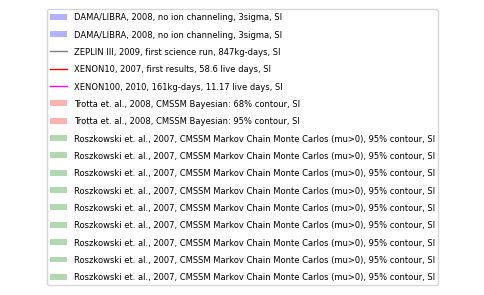

In [10]:
Client.get_mpl_legend(plot_id)